In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [19]:
df = pd.read_csv('./data/train_Wc8LBpr.csv')

print(df.columns)
df.head()

Index(['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender', 'Surge_Pricing_Type'],
      dtype='object')


,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


### Columns

In [20]:
num_cols = ['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index','Customer_Rating', 
            'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3']
ordinal_cols = ['Type_of_Cab', 'Confidence_Life_Style_Index', 'Surge_Pricing_Type']
nominal_cols = ['Destination_Type', 'Gender']
cat_cols = ordinal_cols + nominal_cols
target_col = ['Surge_Pricing_Type']

### Univariate

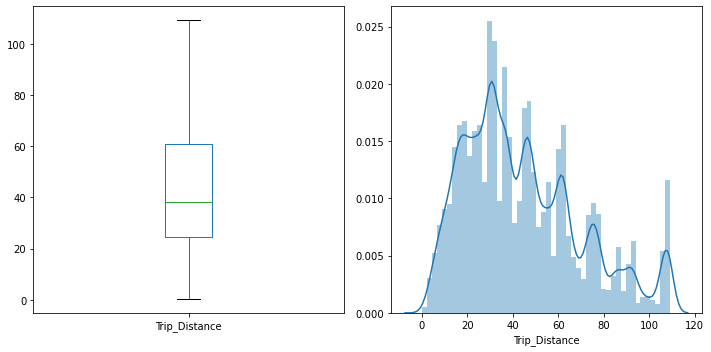

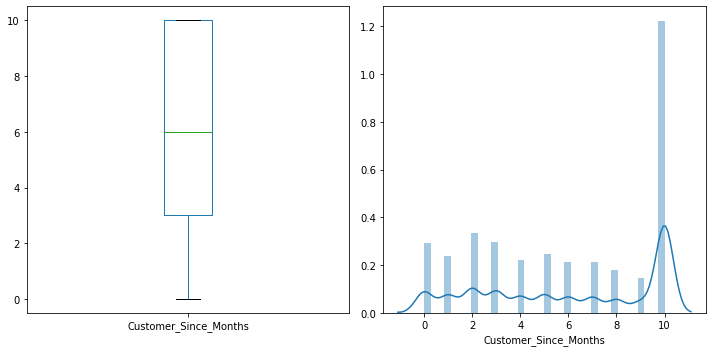

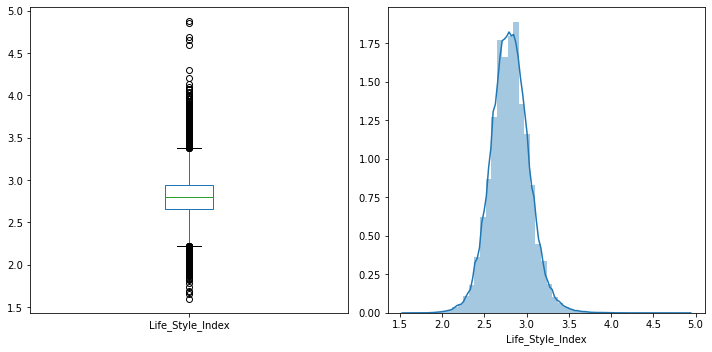

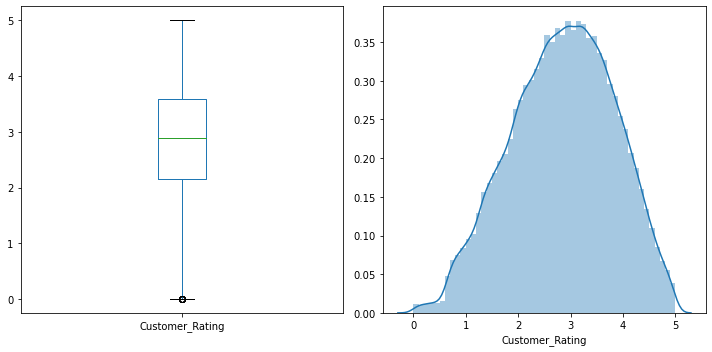

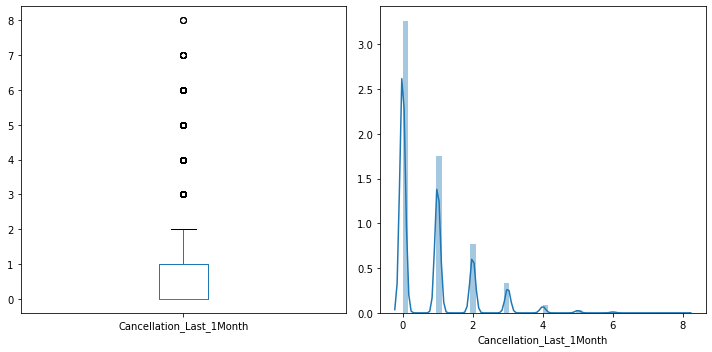

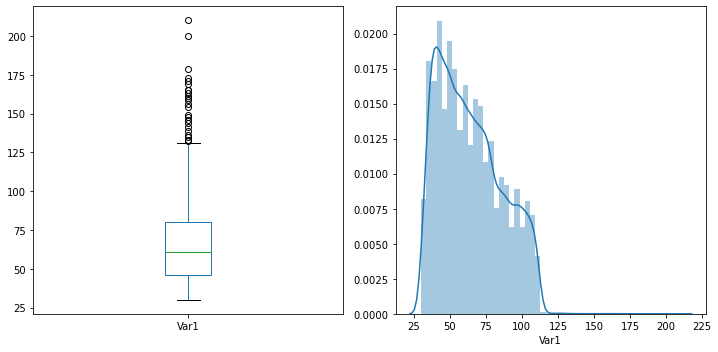

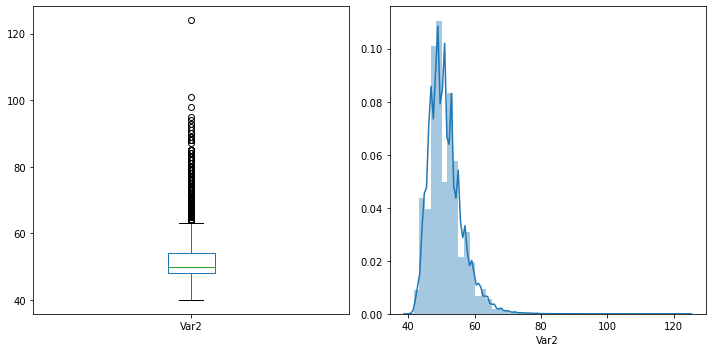

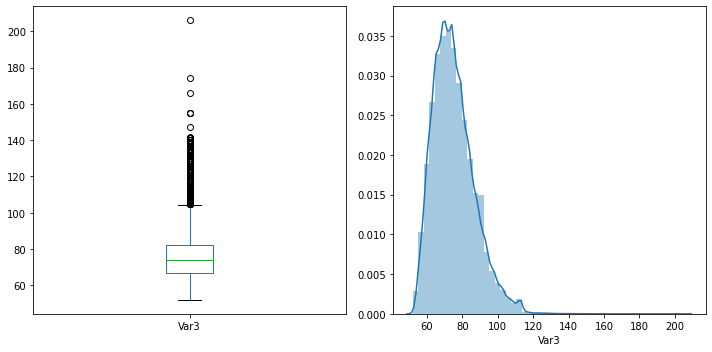

In [62]:
for col in num_cols:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    df[col].plot(kind='box', ax=axes[0])
    sns.distplot(df[col], ax=axes[1])
    plt.tight_layout()